In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, NMF
import os
%matplotlib inline

In [11]:
import requests
response = requests.get(url)
url = 'https://raw.githubusercontent.com/stefannae/SIC-Artificial-Intelligence/main/SIC_AI_Coding_Exercises/SIC_AI_Chapter_05_Coding_Exercises/data_number_nine.csv'
with open('data_number_nine.csv', 'wb') as file:
    file.write(response.content)
print("File downloaded successfully.")

File downloaded successfully.


In [13]:
df = pd.read_csv('data_number_nine.csv', header='infer')

In [15]:
df.shape

(23, 23)

In [17]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.006,0.006,0.006,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.006,0.006
1,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.005,0.005
2,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.7854,0.7776,0.3738,0.1486,0.0050,0.0050,0.0050,0.005,0.005,0.005
3,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.1797,0.5951,...,0.9911,0.9911,0.9911,0.9756,0.8242,0.5912,0.0283,0.005,0.005,0.005
4,0.005,0.005,0.005,0.005,0.005,0.005,0.1836,0.599,0.9368,0.9911,...,0.5214,0.6099,0.7815,0.9911,0.8941,0.8785,0.4088,0.005,0.005,0.005


In [21]:
def ShowMe(X):
    Y= 1.0 - X
    plt.imshow(Y, cmap='gray')
    plt.show()

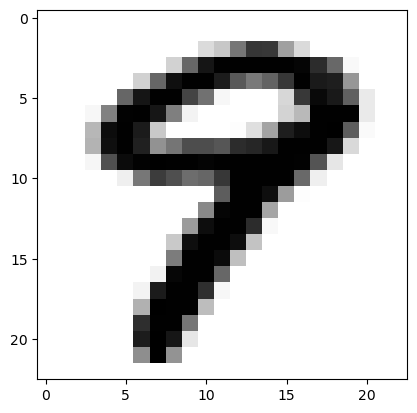

In [23]:
X = np.array(df)
ShowMe(X)


In [25]:
def reducedInputPCA(X,nPC):
    pca = PCA(n_components = nPC) 
    X_pca = pca.fit_transform(X) 
    return pca.inverse_transform(X_pca)

In [27]:
pca = PCA(n_components = 23) 
pca.fit(X)

PCA(n_components=23)

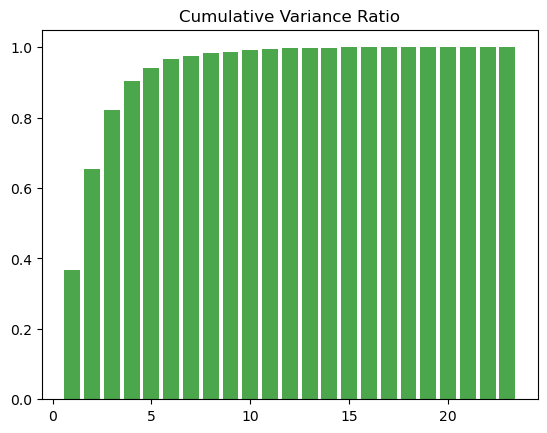

In [29]:
CVRs = np.cumsum(pca.explained_variance_ratio_)
nPCs = np.arange(23)+1 
plt.bar(nPCs,CVRs,color = 'green', alpha=0.7)
plt.title('Cumulative Variance Ratio')
plt.show()


In [33]:
def reducedInputNMF(X,n):
    nmf = NMF(n_components=n, init='random', random_state=0) 
    X_nmf = nmf.fit_transform(X) 
    return nmf.inverse_transform(X_nmf)

N# of Components = 23


D:\Program\Anacoda\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


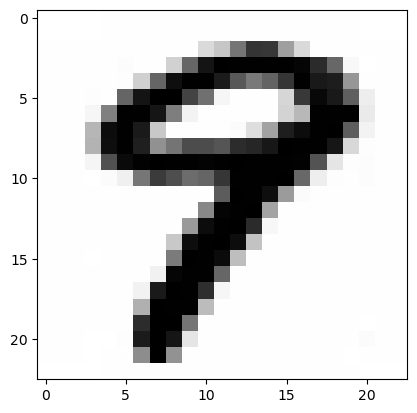

N# of Components = 10


D:\Program\Anacoda\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


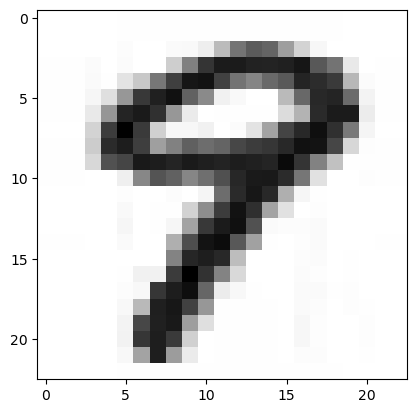

D:\Program\Anacoda\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


N# of Components = 5


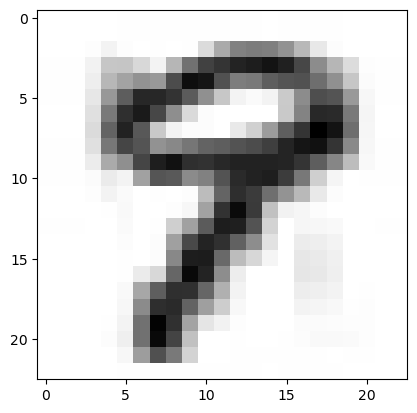

N# of Components = 3


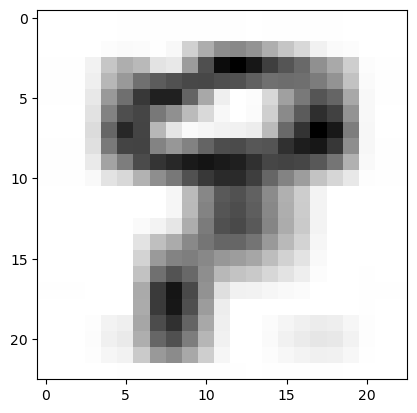

N# of Components = 1


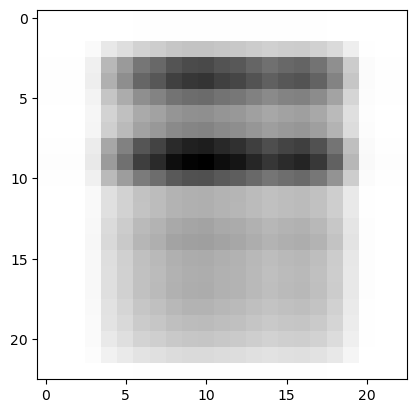

In [35]:
for n in [23, 10, 5, 3, 1]:
    Z = reducedInputNMF(X,n)
    print( "N# of Components = " + str(n))
    ShowMe(Z)

In [37]:
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 5,random_state=123)
X.shape

(150, 8)

In [39]:
myColors = {0:'red',1:'green',2:'blue'}
labelColors = pd.Series(label).apply(lambda x: myColors[x])

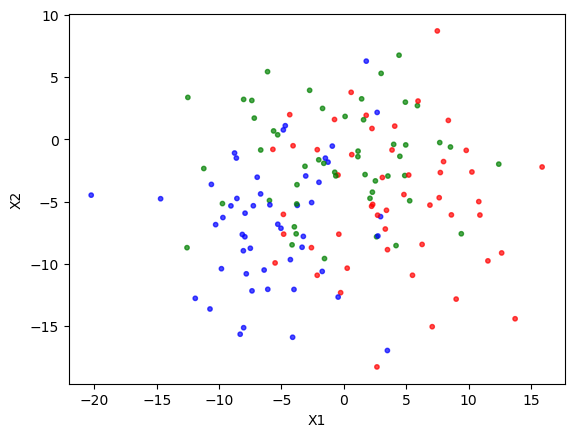

In [41]:
plt.scatter(X[:,0],X[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

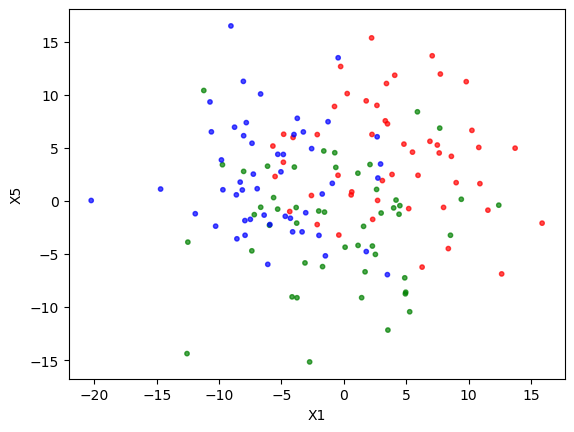

In [43]:
plt.scatter(X[:,0],X[:,4],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X5")
plt.show()

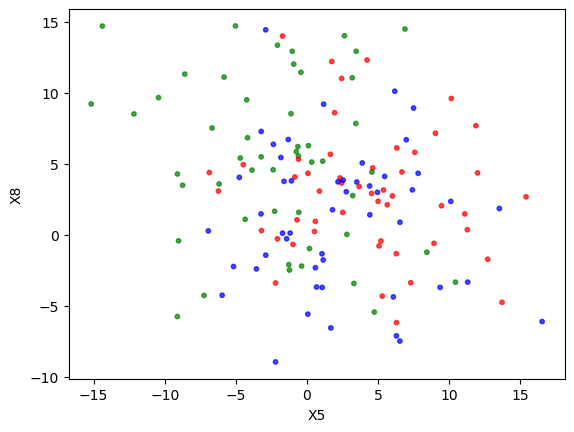

In [45]:
 plt.scatter(X[:,4],X[:,7],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X5")
plt.ylabel("X8")
plt.show()

In [47]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

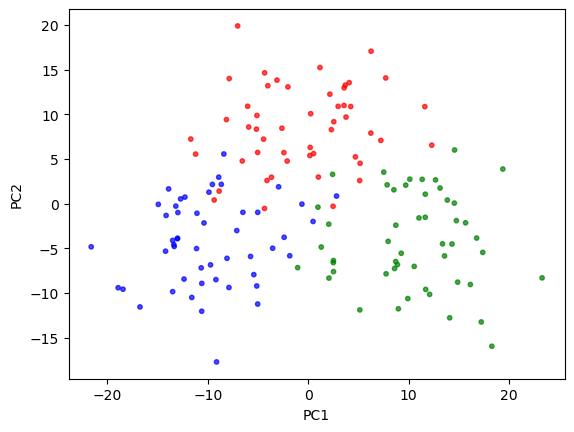

In [49]:
plt.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
